## Analisis - Evolución Demografica & Expectativa de Vida & Tasa de Obesidad por País

### Librerías:

In [ ]:
pip install squarify

In [ ]:
pip install plotly


In [ ]:
pip install nbformat

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px

### Cargar archivos:

In [ ]:
df_pais = pd.read_csv("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\countries_and_continents.csv")

In [375]:
df_evolution = pd.read_excel("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\WORLD_EVOLUTION.xlsx")

In [ ]:
df_obesidad = pd.read_excel("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\DATA_OBESITY.xlsx")

In [377]:
df_exp = pd.read_excel("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\ESPERANZA_VIDA.xlsx")

In [411]:
df_densidad = pd.read_excel("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\DENSIDAD_POBLACION.xlsx")

In [10]:
df_main = pd.read_csv("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\df_main.csv")

In [2]:
df_media_popu = pd.read_csv("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\df_media_popu.csv")

In [4]:
df_media_obesity = pd.read_csv("C:\\Users\\alex_\\PROYECTOS\\TRANNING\\Esperanza de vida - Obesidad Mundial\\df_media_obesity.csv")


### ETL

#### Evolución Demografica

In [5]:
#Fue creado un Data Frame con todos los países de existente en el planeta con sus respectivos continentes
# Consultado valores nulos
df_pais.isna().sum()

Country      0
Continent    0
dtype: int64

In [27]:
#Fue incluido una columna Year con el intervalo de años lo cual existe los datos
years = list(range(1960, 2024))
data = []

for idx, row in df_pais.iterrows():
    for year in years:
        data.append({
            'Country': row['Country'],
            'Continent': row['Continent'],
            'Year': year
        })

# Convertir la lista de diccionarios en un DataFrame
df_resultado = pd.DataFrame(data)

In [ ]:
# Crea una nueva columna en df_resultado para almacenar la población
df_resultado['Population'] = None

In [141]:
# Itera sobre las filas de df_resultado para actualizar la columna Population
for index, row in df_resultado.iterrows():
    # Encuentra la fila en df_exp que coincida con el país y el año
    country = row['Country']
    year = str(row['Year'])  # Convertir el año a string para usarlo como nombre de columna
    
    # Busca en df_exp la fila correspondiente al país
    matched_row = df_exp[df_exp['Country Name'] == country]
    
    if not matched_row.empty:
        # Si se encuentra una coincidencia, busca el valor del año correspondiente
        population = matched_row[year].values[0]
        
        # Asigna ese valor a la columna Population de df_resultado
        df_resultado.at[index, 'Population'] = population

# Ahora df_resultado tiene la columna Population con los valores correspondientes


In [145]:
#consultar valores nulos
df_resultado.isna().sum()

Country       0
Continent     0
Year          0
Population    0
dtype: int64

In [146]:
#Guardar el df en formato csv
df_resultado.to_csv("df_main.csv")

In [143]:
# Crear una lista de países únicos en ambos DataFrames
paises_resultado = df_resultado['Country'].unique()
paises_exp = df_exp['Country Name'].unique()

# Crear una lista para almacenar los países que no están en df_exp
paises_no_localizados = []

# Inicializar contadores para los países coincidentes y no coincidentes
coincidencias = 0
no_coincidencias = 0

# Iterar sobre los países en df_resultado y verificar si están en df_exp
for pais in paises_resultado:
    if pais in paises_exp:
        coincidencias += 1
    else:
        no_coincidencias += 1
        paises_no_localizados.append(pais)

# Informar el resultado
print(f"Países coincidentes: {coincidencias}")
print(f"Países no coincidentes: {no_coincidencias}")
print("Lista de países no localizados:")
print(paises_no_localizados)


Países coincidentes: 193
Países no coincidentes: 2
Lista de países no localizados:
['Taiwan', 'Vatican City']


In [38]:
#Lista de paises no con nombres divergente, no encontrados en el df_exp
paises_no_localizados

['Bahamas',
 'Brunei',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Czech Republic',
 'East Timor',
 'Egypt',
 'Gambia',
 'Iran',
 'Ivory Coast',
 'Kyrgyzstan',
 'Laos',
 'Micronesia',
 'North Korea',
 'Russia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'South Korea',
 'Syria',
 'Taiwan',
 'Turkey',
 'Vatican City',
 'Venezuela',
 'Vietnam',
 'Yemen']

In [139]:
#Consulta individual de país en el df_obesidad por su nombre
busqueda = df_exp.loc[df_exp['Country Name'].str.startswith("Yemen", na=True)]
busqueda

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0


In [140]:
#Asignar el nombre de los paises con divergencia en su nombre entre df_resultado y df_exp (Evolución Demografica) de forma manual
mask = df_exp['Country Name'] == "Yemen, Rep."

df_exp.loc[mask, 'Country Name'] = 'Yemen'

In [144]:
# Lista de países que deseas eliminar
paises_a_eliminar = ['Taiwan', 'Vatican City']

# Filtrar el DataFrame para eliminar las filas donde el país está en la lista
df_resultado = df_resultado[~df_resultado['Country'].isin(paises_a_eliminar)]

#### Obesity Rate

In [232]:
# Crear una lista de países únicos en ambos DataFrames
paises_resultado = df_resultado['Country'].unique()
pais_obesity = df_obesidad['Country'].unique()

# Crear una lista para almacenar los países que no están en df_exp
paises_no_localizados = []

# Inicializar contadores para los países coincidentes y no coincidentes
coincidencias = 0
no_coincidencias = 0

# Iterar sobre los países en df_resultado y verificar si están en df_exp
for pais in paises_resultado:
    if pais in pais_obesity:
        coincidencias += 1
    else:
        no_coincidencias += 1
        paises_no_localizados.append(pais)

# Informar el resultado
print(f"Países coincidentes: {coincidencias}")
print(f"Países no coincidentes: {no_coincidencias}")
print("Lista de países no localizados:")
print(paises_no_localizados)


Países coincidentes: 190
Países no coincidentes: 3
Lista de países no localizados:
['Liechtenstein', 'Monaco', 'San Marino']


In [219]:
#Consulta individual de país en el df_obesidad por su nombre
busqueda = df_obesidad.loc[df_obesidad['Location'].str.contains("Viet", na=True, regex=False)]
busqueda = busqueda['Location'].value_counts().reset_index()
busqueda

,Location,count
0,Viet Nam,99


In [220]:
#Asignar el nombre de los paises con divergencia en su nombre entre df_resultado y df_obesidad de forma manual
mask = df_obesidad['Location'] == "Viet Nam"

df_obesidad.loc[mask, 'Location'] = 'Vietnam'

In [ ]:
# Lista de géneros que deseas añadir
generos = ['Female', 'Male', 'Both sexes']

# Crear un DataFrame con todas las combinaciones posibles de Country, Year y Gender
df_generos = pd.DataFrame([(country, year, gender) 
                           for country in df_resultado['Country'].unique()
                           for year in df_resultado['Year'].unique()
                           for gender in generos], 
                          columns=['Country', 'Year', 'Gender'])

# Realizar un merge con el DataFrame original para añadir la columna Gender
df_resultado_extendido = pd.merge(df_resultado, df_generos, on=['Country', 'Year'])


In [224]:
#consultar el nombre de las columnas
df_obesidad.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Country',
       'Period type', 'Year', 'IsLatestYear', 'Dim1 type', 'Gender',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [223]:
#cambiar el nombre de las columnas
df_obesidad.rename(columns={'Location': 'Country'}, inplace=True)
df_obesidad.rename(columns={'Period': 'Year'}, inplace=True)
df_obesidad.rename(columns={'Dim1': 'Gender'}, inplace=True)

In [227]:
# Hacer el merge de df_obesidad a df_resultado
df_combinado = pd.merge(df_resultado_extendido, 
                        df_obesidad[['Country', 'Year', 'Gender','FactValueNumeric','FactValueNumericLow','FactValueNumericHigh','Value']], 
                        on=['Country', 'Year','Gender'], 
                        how='left')

In [238]:
#Valores nulos en el df correspondientes a datos no existentes anterior a la decada de 90.
df_combinado.isna().sum()

Country                     0
Continent                   0
Year                        0
Population                  0
Gender                      0
FactValueNumeric        18246
FactValueNumericLow     18246
FactValueNumericHigh    18246
Value                   18246
dtype: int64

#### Esperanza de vida

In [316]:
# Crear una lista de países únicos en ambos DataFrames
paises_resultado = df_resultado['Country'].unique()
paises_exp = df_exp['Country Name'].unique()

# Crear una lista para almacenar los países que no están en df_exp
paises_no_localizados = []

# Inicializar contadores para los países coincidentes y no coincidentes
coincidencias = 0
no_coincidencias = 0

# Iterar sobre los países en df_resultado y verificar si están en df_exp
for pais in paises_resultado:
    if pais in paises_exp:
        coincidencias += 1
    else:
        no_coincidencias += 1
        paises_no_localizados.append(pais)

# Informar el resultado
print(f"Países coincidentes: {coincidencias}")
print(f"Países no coincidentes: {no_coincidencias}")
print("Lista de países no localizados:")
print(paises_no_localizados)


Países coincidentes: 193
Países no coincidentes: 0
Lista de países no localizados:
[]


In [314]:
#Consultar los países no encontrados de forma individual
busqueda = df_exp.loc[df_exp['Country Name'].str.contains("Yemen", na=True, regex=False)]
busqueda = busqueda['Country Name'].value_counts().reset_index()
busqueda

,Country Name,count
0,"Yemen, Rep.",1


In [315]:
#Corrección manual de 25 países con nombre distinto de df_resultado en df_exp
mask = df_exp['Country Name'] == "Yemen, Rep."

df_exp.loc[mask, 'Country Name'] = 'Yemen'

In [ ]:
df_combinado.to_csv("df_main.csv")

In [319]:
#Crear una columna con valores Nulo
df_combinado['Life_expt'] = None

In [342]:
# Itera sobre las filas de df_resultado para actualizar la columna Population
for index, row in df_combinado.iterrows():
    # Encuentra la fila en df_exp que coincida con el país y el año
    country = row['Country']
    year = str(row['Year'])  # Convertir el año a string para usarlo como nombre de columna
    
    # Busca en df_exp la fila correspondiente al país
    matched_row = df_exp[df_exp['Country Name'] == country]
    
    if not matched_row.empty:
        # Si se encuentra una coincidencia, busca el valor del año correspondiente
        expectativa = matched_row[year].values[0]
        
        # Asigna ese valor a la columna Population de df_resultado
        df_combinado.loc[index, 'Life_expt_2'] = expectativa


In [330]:
# Convertir la columna 'Life_expt' a tipo numérico
df_combinado['Life_expt'] = pd.to_numeric(df_combinado['Life_expt'])

In [360]:
# Redondear la columna 'Life_expt' a número intero
df_combinado['Life_expt'] = df_combinado['Life_expt'].fillna(0).astype(int)

# Almacenar el resultado en un nuevo DataFrame
df_main = df_combinado.copy()


In [354]:
#Buscar países con la tasa de esperanza de vida nula
nulo = df_combinado.loc[df_combinado['Life_expt_2'].isna(), ['Country','Year','Life_expt']]
nulo

,Country,Year,Life_expt
189,Afghanistan,2023,NaN
190,Afghanistan,2023,NaN
191,Afghanistan,2023,NaN
381,Albania,2023,NaN
382,Albania,2023,NaN
...,...,...,...
36862,Zambia,2023,NaN
36863,Zambia,2023,NaN
37053,Zimbabwe,2023,NaN
37054,Zimbabwe,2023,NaN


In [ ]:
#Paises sin información de esperanza de vida.

paises_no_expect_life = ['Seychelles','San Marino','Palau','Monaco','Liechtenstein','Israel','Andorra']

In [363]:
#Borrar columnas
df_main.drop(columns='Life_expt_2', inplace=True)

In [372]:
#Tipo de datos
df_main.dtypes

Country               object
Continent             object
Year                   int64
Population             int64
Gender                object
Obesity_rate         float64
Freq_obesity_low     float64
Freq_obesity_high    float64
Freq_obesity          object
Life_expt              int64
dtype: object

In [368]:
# Reemplazar valores nulos por 0 y luego inferir el tipo de datos correctamente
df_main['Population'] = df_main['Population'].fillna(0).infer_objects().astype(int)

In [371]:
#Cambiar nombre de columnas
df_main.rename(columns={'FactValueNumeric':'Obesity_rate','FactValueNumericLow':'Freq_obesity_low','FactValueNumericHigh':'Freq_obesity_high','Value':'Freq_obesity'},inplace=True)

In [373]:
# Guardar el df principal en un archivo con formato csv
df_main.to_csv("df_main.csv")

#### Densidad de la Población

In [381]:
df_densidad.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [487]:
# Crear una lista de países únicos en ambos DataFrames
paises_resultado = df_main['Country'].unique()
paises_exp = df_densidad['Country Name'].unique()

# Crear una lista para almacenar los países que no están en df_exp
paises_no_localizados = []

# Inicializar contadores para los países coincidentes y no coincidentes
coincidencias = 0
no_coincidencias = 0

# Iterar sobre los países en df_resultado y verificar si están en df_exp
for pais in paises_resultado:
    if pais in paises_exp:
        coincidencias += 1
    else:
        no_coincidencias += 1
        paises_no_localizados.append(pais)

# Informar el resultado
print(f"Países coincidentes: {coincidencias}")
print(f"Países no coincidentes: {no_coincidencias}")
print("Lista de países no localizados:")
print(paises_no_localizados)


Países coincidentes: 193
Países no coincidentes: 0
Lista de países no localizados:
[]


In [488]:
paises_no_localizados

[]

In [484]:
#Consultar los países no encontrados de forma individual
busqueda = df_densidad.loc[df_densidad['Country Name'].str.contains("Congo", na=True, regex=False)]
#busqueda = busqueda['Country Name'].value_counts().reset_index()
busqueda

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
43,"Congo, Dem. Rep.",COD,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,2344860.0,2344860.0,2344860.0,2344860.0,2344860.0,...,2344860.0,2344860.0,2344860.0,2344860.0,2344860.0,2344860.0,2344860.0,2344860.0,NaN,NaN
44,"Congo, Rep.",COG,Surface area (sq. km),AG.SRF.TOTL.K2,NaN,342000.0,342000.0,342000.0,342000.0,342000.0,...,342000.0,342000.0,342000.0,342000.0,342000.0,342000.0,342000.0,342000.0,NaN,NaN


In [486]:
#Corrección manual de 25 países con nombre distinto de df_resultado en df_exp
mask = df_densidad['Country Name'] == "Congo, Rep."

df_densidad.loc[mask, 'Country Name'] = 'Congo, Republic of the'

In [415]:
# Crear una lista de países únicos en ambos DataFrames
paises_resultado = paises_no_localizados

for pais in paises_resultado:
    # Corrección manual de 25 países con nombre distinto de df_resultado en df_densidad
    mask = df_densidad['Country Name'].str.contains(pais, na=False, regex=False)
    
    if mask.any():
        # Si hay una coincidencia, se actualiza el nombre del país en df_densidad
        df_densidad.loc[mask, 'Country Name'] = pais


In [489]:
# Itera sobre las filas de df_resultado para actualizar la columna Population
for index, row in df_main.iterrows():
    # Encuentra la fila en df_exp que coincida con el país y el año
    country = row['Country']
    year = str(row['Year'])  # Convertir el año a string para usarlo como nombre de columna
    
    # Busca en df_exp la fila correspondiente al país
    matched_row = df_densidad[df_densidad['Country Name'] == country]
    
    if not matched_row.empty:
        # Si se encuentra una coincidencia, busca el valor del año correspondiente
        expectativa = matched_row[year].values[0]
        
        # Asigna ese valor a la columna Population de df_resultado
        df_main.loc[index, 'Population_km2'] = expectativa


In [490]:
df_main['Density'] = df_main['Population'] / df_main['Population_km2']

In [491]:
df_main

,Country,Continent,Year,Population,Gender,Obesity_rate,Freq_obesity_low,Freq_obesity_high,Freq_obesity,Life_expt,Population_km2,Density
0,Afghanistan,Asia,1960,8622466,Female,NaN,NaN,NaN,NaN,32,NaN,NaN
1,Afghanistan,Asia,1960,8622466,Male,NaN,NaN,NaN,NaN,32,NaN,NaN
2,Afghanistan,Asia,1960,8622466,Both sexes,NaN,NaN,NaN,NaN,32,NaN,NaN
3,Afghanistan,Asia,1961,8790140,Female,NaN,NaN,NaN,NaN,33,652860.0,13.46405
4,Afghanistan,Asia,1961,8790140,Male,NaN,NaN,NaN,NaN,33,652860.0,13.46405
...,...,...,...,...,...,...,...,...,...,...,...,...
37051,Zimbabwe,Africa,2022,16320537,Male,4.47,2.80,6.56,4.5 [2.8-6.6],59,NaN,NaN
37052,Zimbabwe,Africa,2022,16320537,Both sexes,12.43,10.02,15.10,12.4 [10.0-15.1],59,NaN,NaN
37053,Zimbabwe,Africa,2023,16665409,Female,NaN,NaN,NaN,NaN,0,NaN,NaN
37054,Zimbabwe,Africa,2023,16665409,Male,NaN,NaN,NaN,NaN,0,NaN,NaN


In [492]:
df_main.to_csv("df_main.csv")

### EDA: Exploratory Data Analysis

#### Analisis columnas:

In [4]:
df_main.dtypes

Unnamed: 0             int64
Country               object
Continent             object
Year                   int64
Population             int64
Gender                object
Obesity_rate         float64
Freq_obesity_low     float64
Freq_obesity_high    float64
Freq_obesity          object
Life_expt              int64
Population_km2       float64
Density              float64
dtype: object

In [6]:
df_main.isna().sum()

Unnamed: 0               0
Country                  0
Continent                0
Year                     0
Population               0
Gender                   0
Obesity_rate         18246
Freq_obesity_low     18246
Freq_obesity_high    18246
Freq_obesity         18246
Life_expt                0
Population_km2        2103
Density               2103
dtype: int64

In [7]:
df_main.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Year', 'Population', 'Gender',
       'Obesity_rate', 'Freq_obesity_low', 'Freq_obesity_high', 'Freq_obesity',
       'Life_expt', 'Population_km2', 'Density'],
      dtype='object')

#### Valores nulos

In [ ]:
# Ver los valores nulos por año y columna KPI
print("Indentificar los Nulos por KPI\n")
nulos_por_year = df_main.groupby('Year')[['Population', 'Obesity_rate', 'Life_expt', 'Population_km2', 'Density']].apply(lambda x: x.isnull().sum())
print(nulos_por_year)

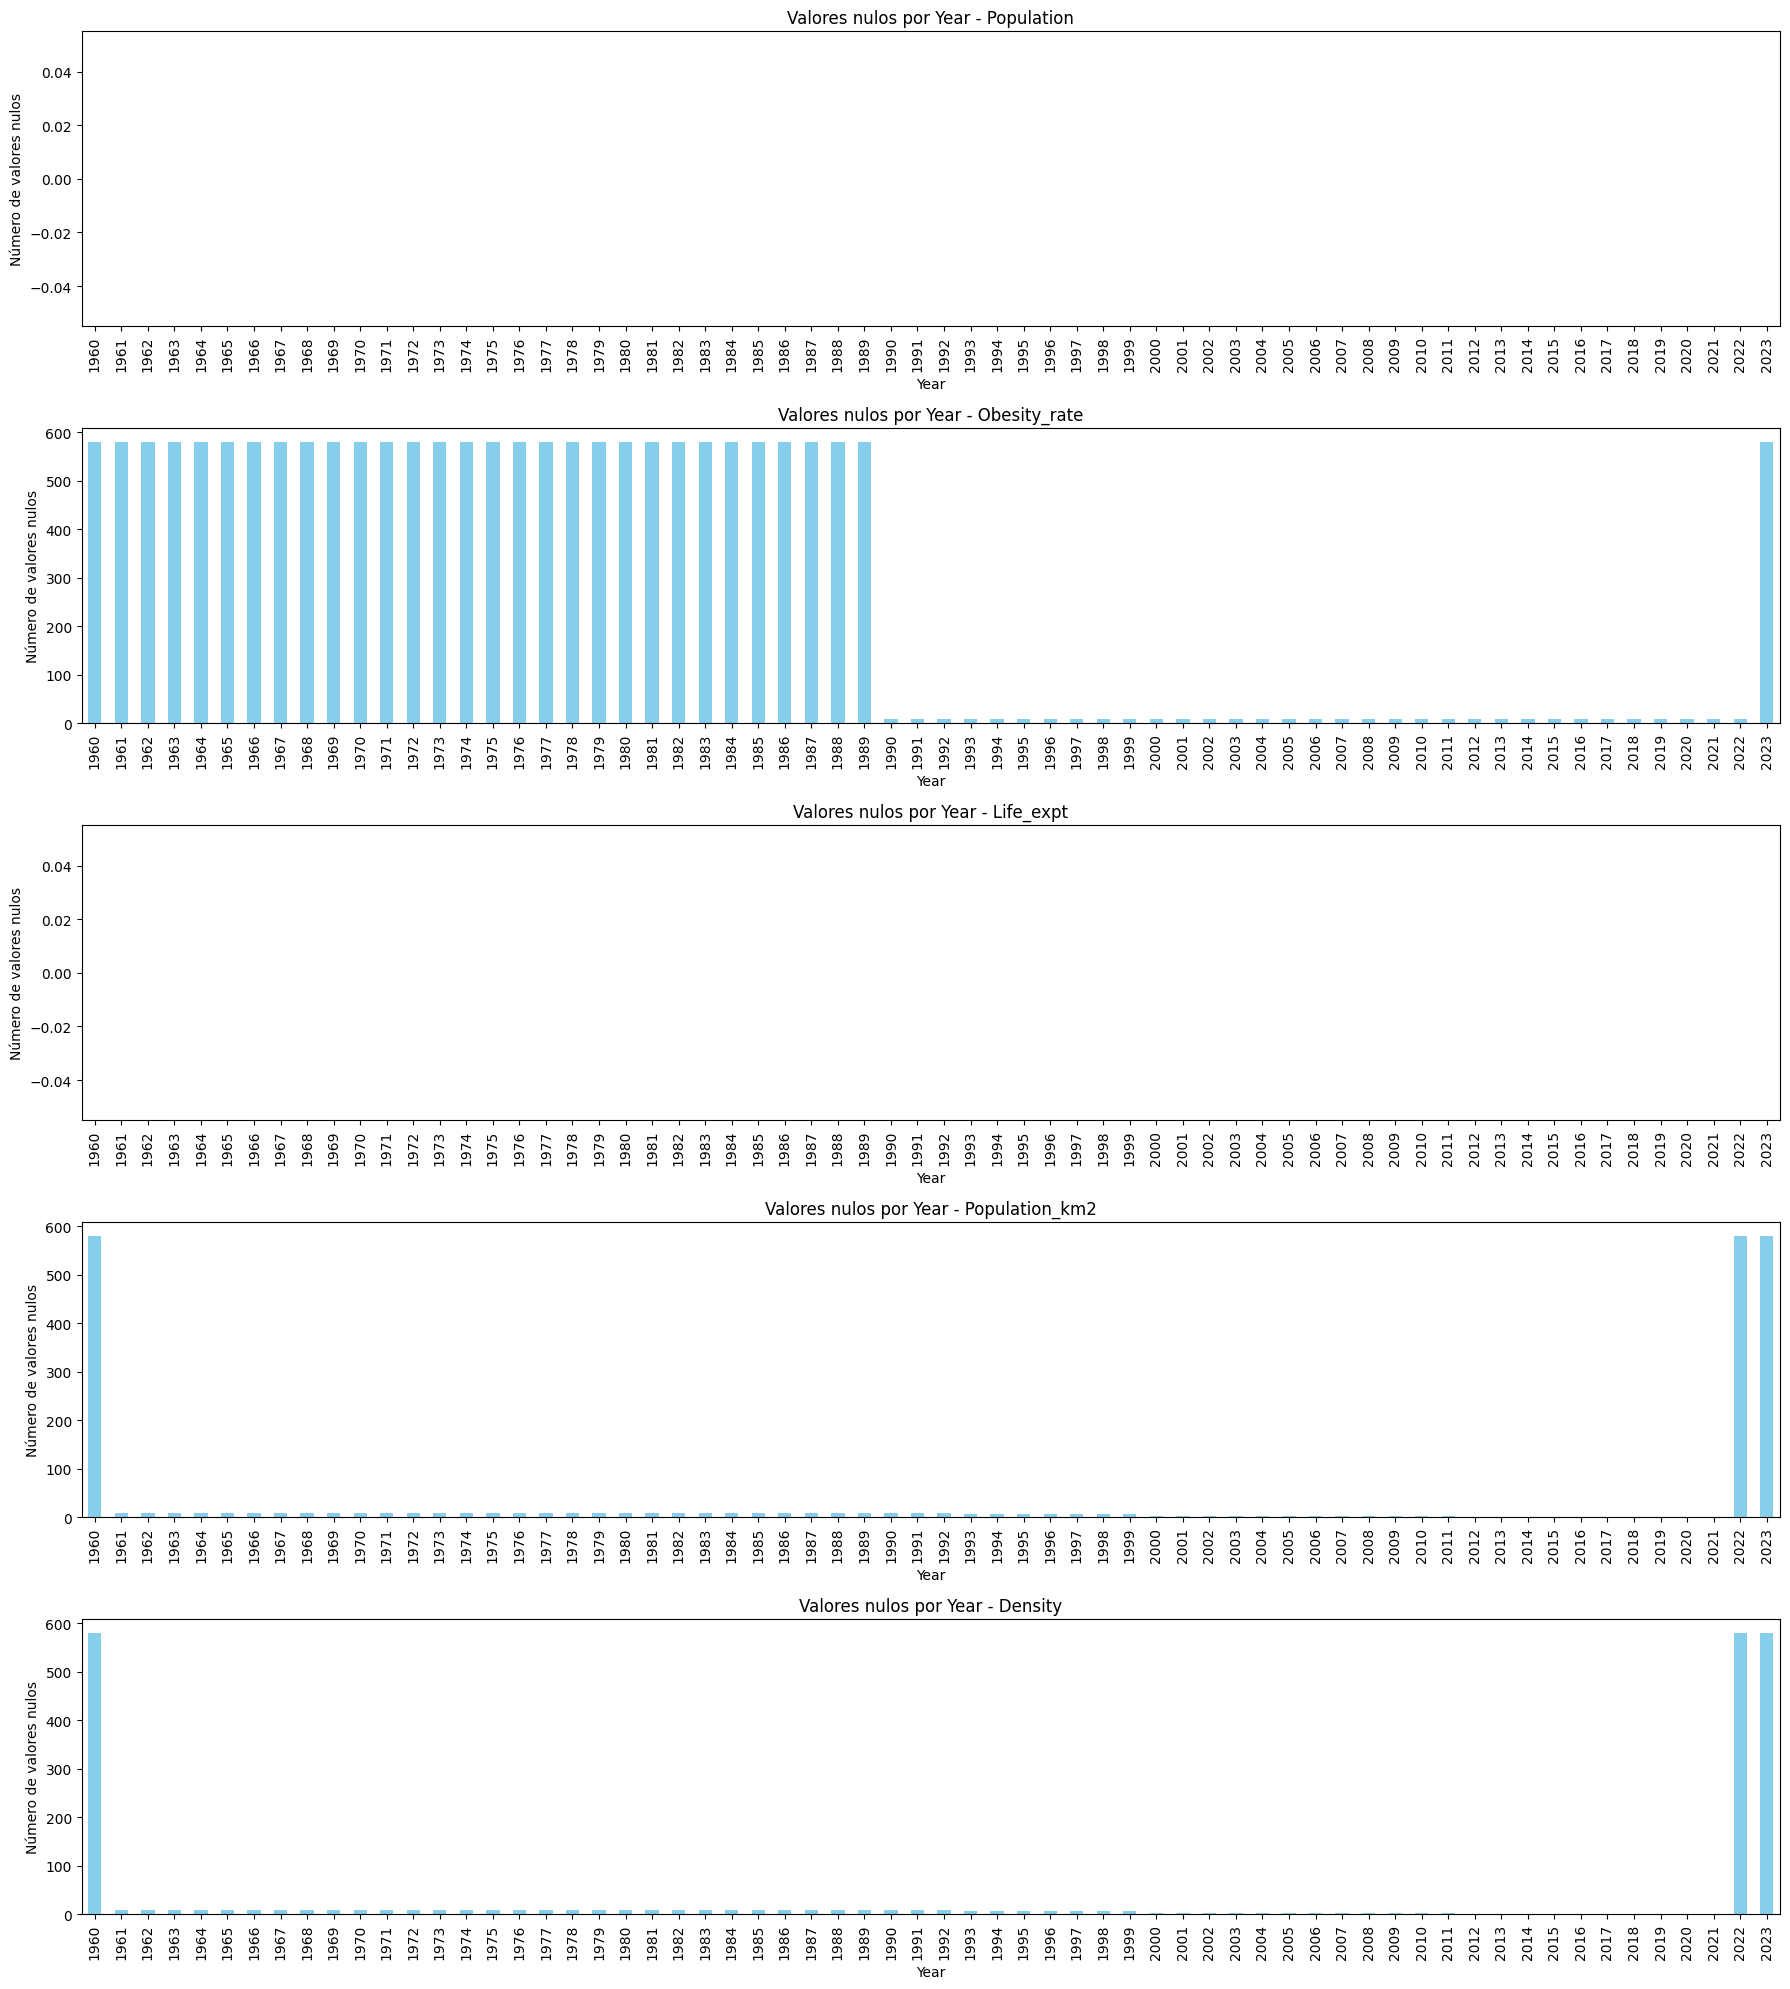

In [17]:
# Visualización de los valores nulos con gráficos de barras individuales
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(18, 20))

# Lista de columnas KPI
kpi_columns = ['Population', 'Obesity_rate', 'Life_expt', 'Population_km2', 'Density']

# Generar un gráfico de barras para cada KPI
for i, col in enumerate(kpi_columns):
    nulos_por_year[col].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Valores nulos por Year - {col}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Número de valores nulos')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()
plt.show()


#### Análisis Estadístico

In [7]:
# Selección de las columnas KPI que deseas analizar
kpi_columns = ['Population', 'Obesity_rate', 'Life_expt']

# Calcular las medidas estadísticas básicas para cada columna
for col in kpi_columns:
    print(f"\nAnálisis para {col}:")
    print(f"Media: {df_main[col].mean()}")
    print(f"Mediana: {df_main[col].median()}")
    print(f"Moda: {df_main[col].mode()[0]}")  # La moda puede tener más de un valor, aquí mostramos el primero
    print(f"Rango: {df_main[col].max() - df_main[col].min()}")
    print(f"Desviación Estándar: {df_main[col].std()}")
    print(f"Varianza: {df_main[col].var()}")



Análisis para Population:
Media: 28056545.113746762
Mediana: 5275724.0
Moda: 10318
Rango: 1428623081
Desviación Estándar: 110826654.78366782
Varianza: 1.228254741053828e+16

Análisis para Obesity_rate:
Media: 16.18532057416268
Mediana: 14.59
Moda: 16.18
Rango: 78.978
Desviación Estándar: 12.400740050837266
Varianza: 153.77835380843945

Análisis para Life_expt:
Media: 60.890544041450774
Mediana: 65.0
Moda: 70
Rango: 84
Desviación Estándar: 16.73389082235721
Varianza: 280.02310205457087


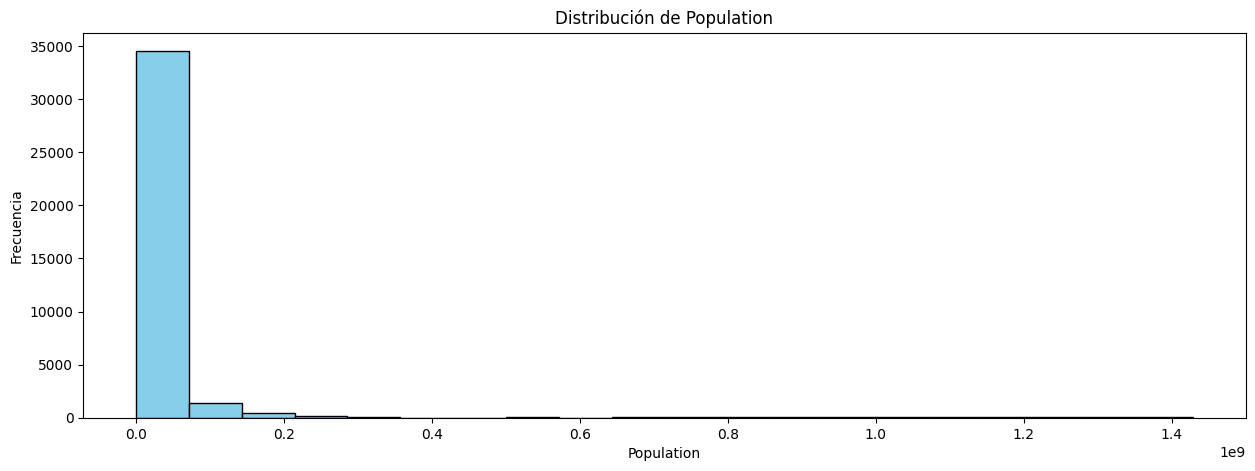

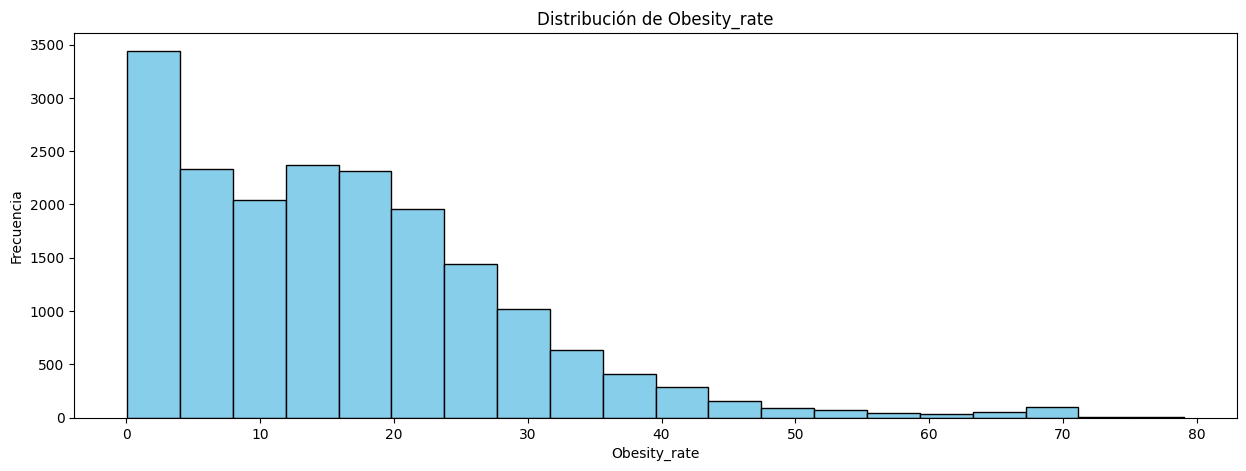

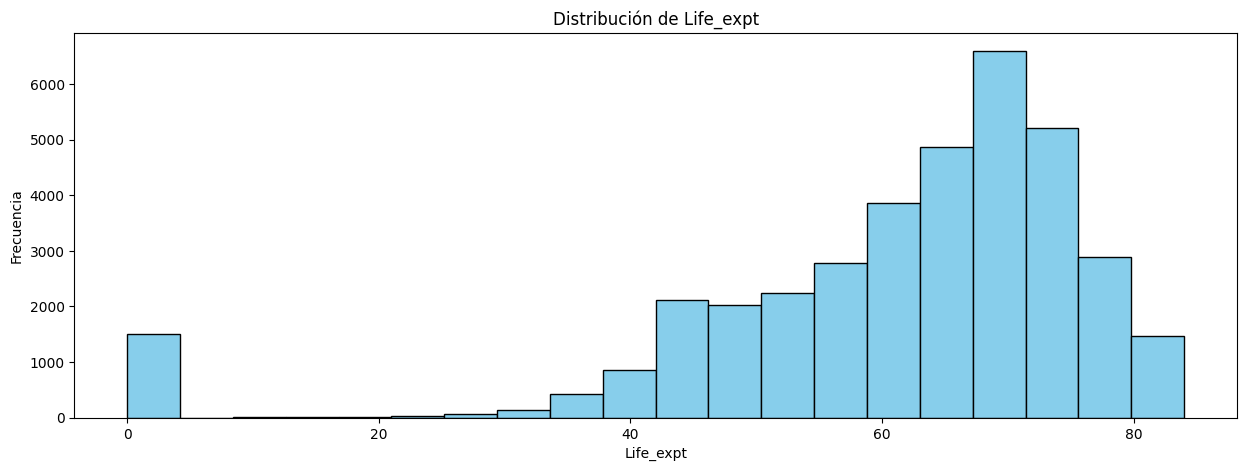

In [8]:
# Crear histogramas para cada columna
for col in kpi_columns:
    plt.figure(figsize=(15, 5))
    plt.hist(df_main[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

##### Evolución Demografica

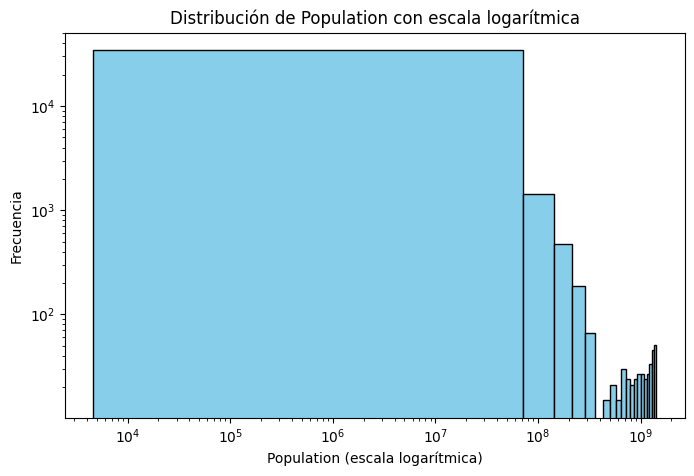

In [20]:
# Histograma con escala logarítmica para la columna Population
plt.figure(figsize=(8, 5))
plt.hist(df_main['Population'].dropna(), bins=20, color='skyblue', edgecolor='black', log=True)
plt.title('Distribución de Population con escala logarítmica')
plt.xlabel('Population (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.xscale('log')  # Escala logarítmica en el eje X
plt.show()


In [8]:
country_search = df_main['Country'].unique()
media_paises = []

for country in country_search:
    pais = df_main.loc[(df_main['Country']== country)]
    media = round(pais['Population'].mean(),1)
    
    media_paises.append({
        "Country": country,
        "Media_populacion": media
    })

df_media_popu = pd.DataFrame(media_paises)

In [ ]:
df_media_popu = pd.DataFrame(media_paises)
df_media_popu

In [21]:
df_media_popu.to_csv("df_media_popu.csv")

In [4]:
fig = px.choropleth(df_media_popu,
                    locations="Country",
                    locationmode='country names',
                    color="Media_populacion",
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    title="Mapa de la media poblacional por país")
fig.show()


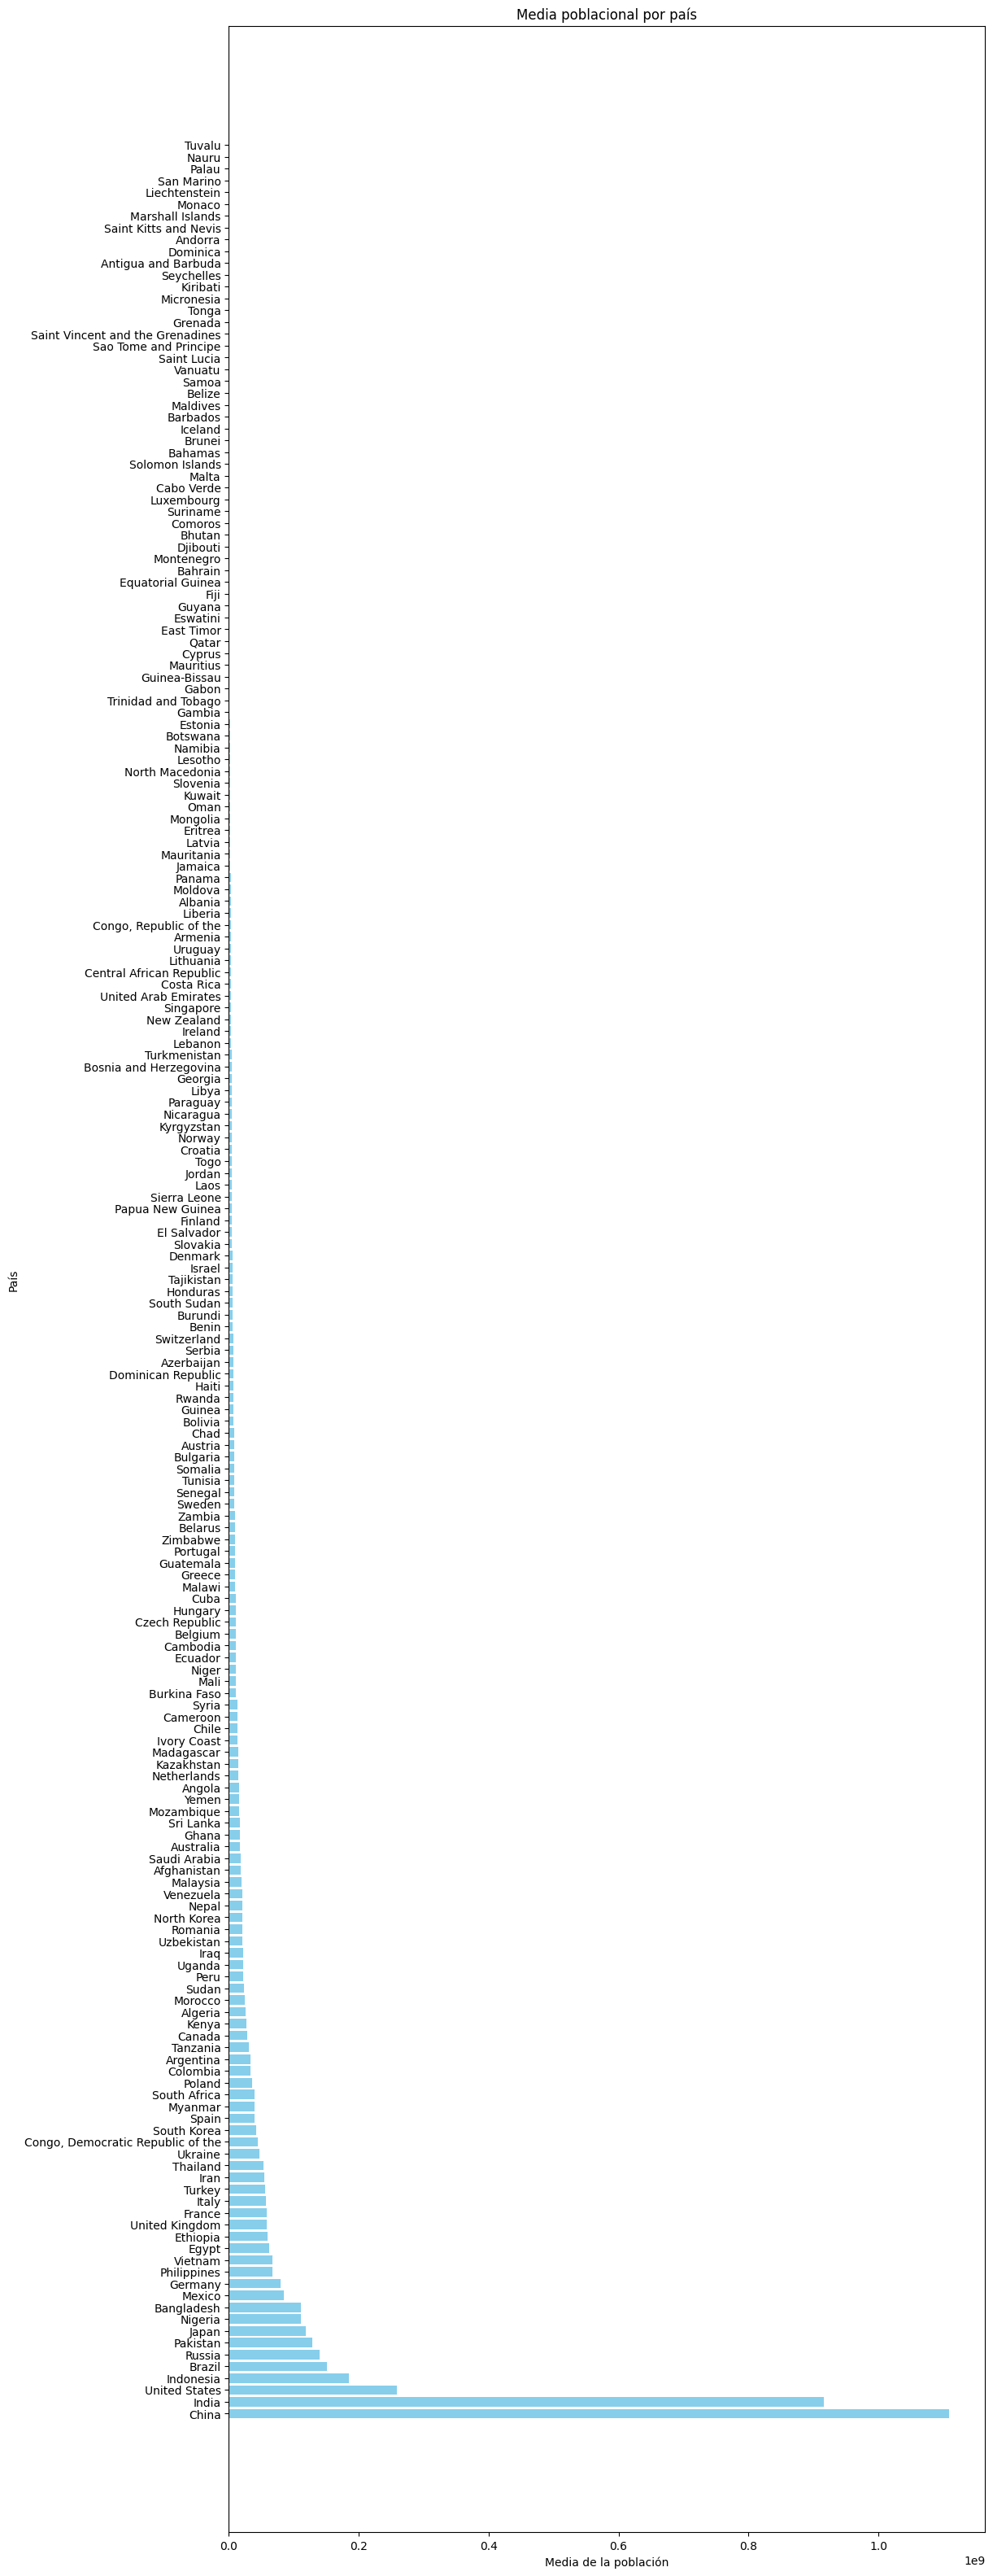

In [6]:
df_media_popu_sorted = df_media_popu.sort_values(by="Media_populacion", ascending=False)

plt.figure(figsize=(12, 40))
plt.barh(df_media_popu_sorted['Country'], df_media_popu_sorted['Media_populacion'], color='skyblue')
plt.title('Media poblacional por país')
plt.xlabel('Media de la población')
plt.ylabel('País')
plt.show()


##### Tasa Obesidad Mundial

In [9]:
df_main.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Year', 'Population', 'Gender',
       'Obesity_rate', 'Freq_obesity_low', 'Freq_obesity_high', 'Freq_obesity',
       'Life_expt', 'Population_km2', 'Density'],
      dtype='object')

In [10]:
country_search = df_main['Country'].unique()
obesidad_paises = []

for country in country_search:
    pais = df_main.loc[(df_main['Country']== country)]
    media_obesity = round(pais['Obesity_rate'].mean(),1)
    
    obesidad_paises.append({
        "Country": country,
        "Media_obesity": media_obesity
    })

df_media_obesity = pd.DataFrame(obesidad_paises)

In [11]:
df_media_obesity.to_csv("df_media_obesity.csv")

In [8]:
fig = px.choropleth(df_media_obesity,
                    locations="Country",
                    locationmode='country names',
                    color="Media_obesity",
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    title="Mapa de la media tasa obesidad por país")
fig.show()


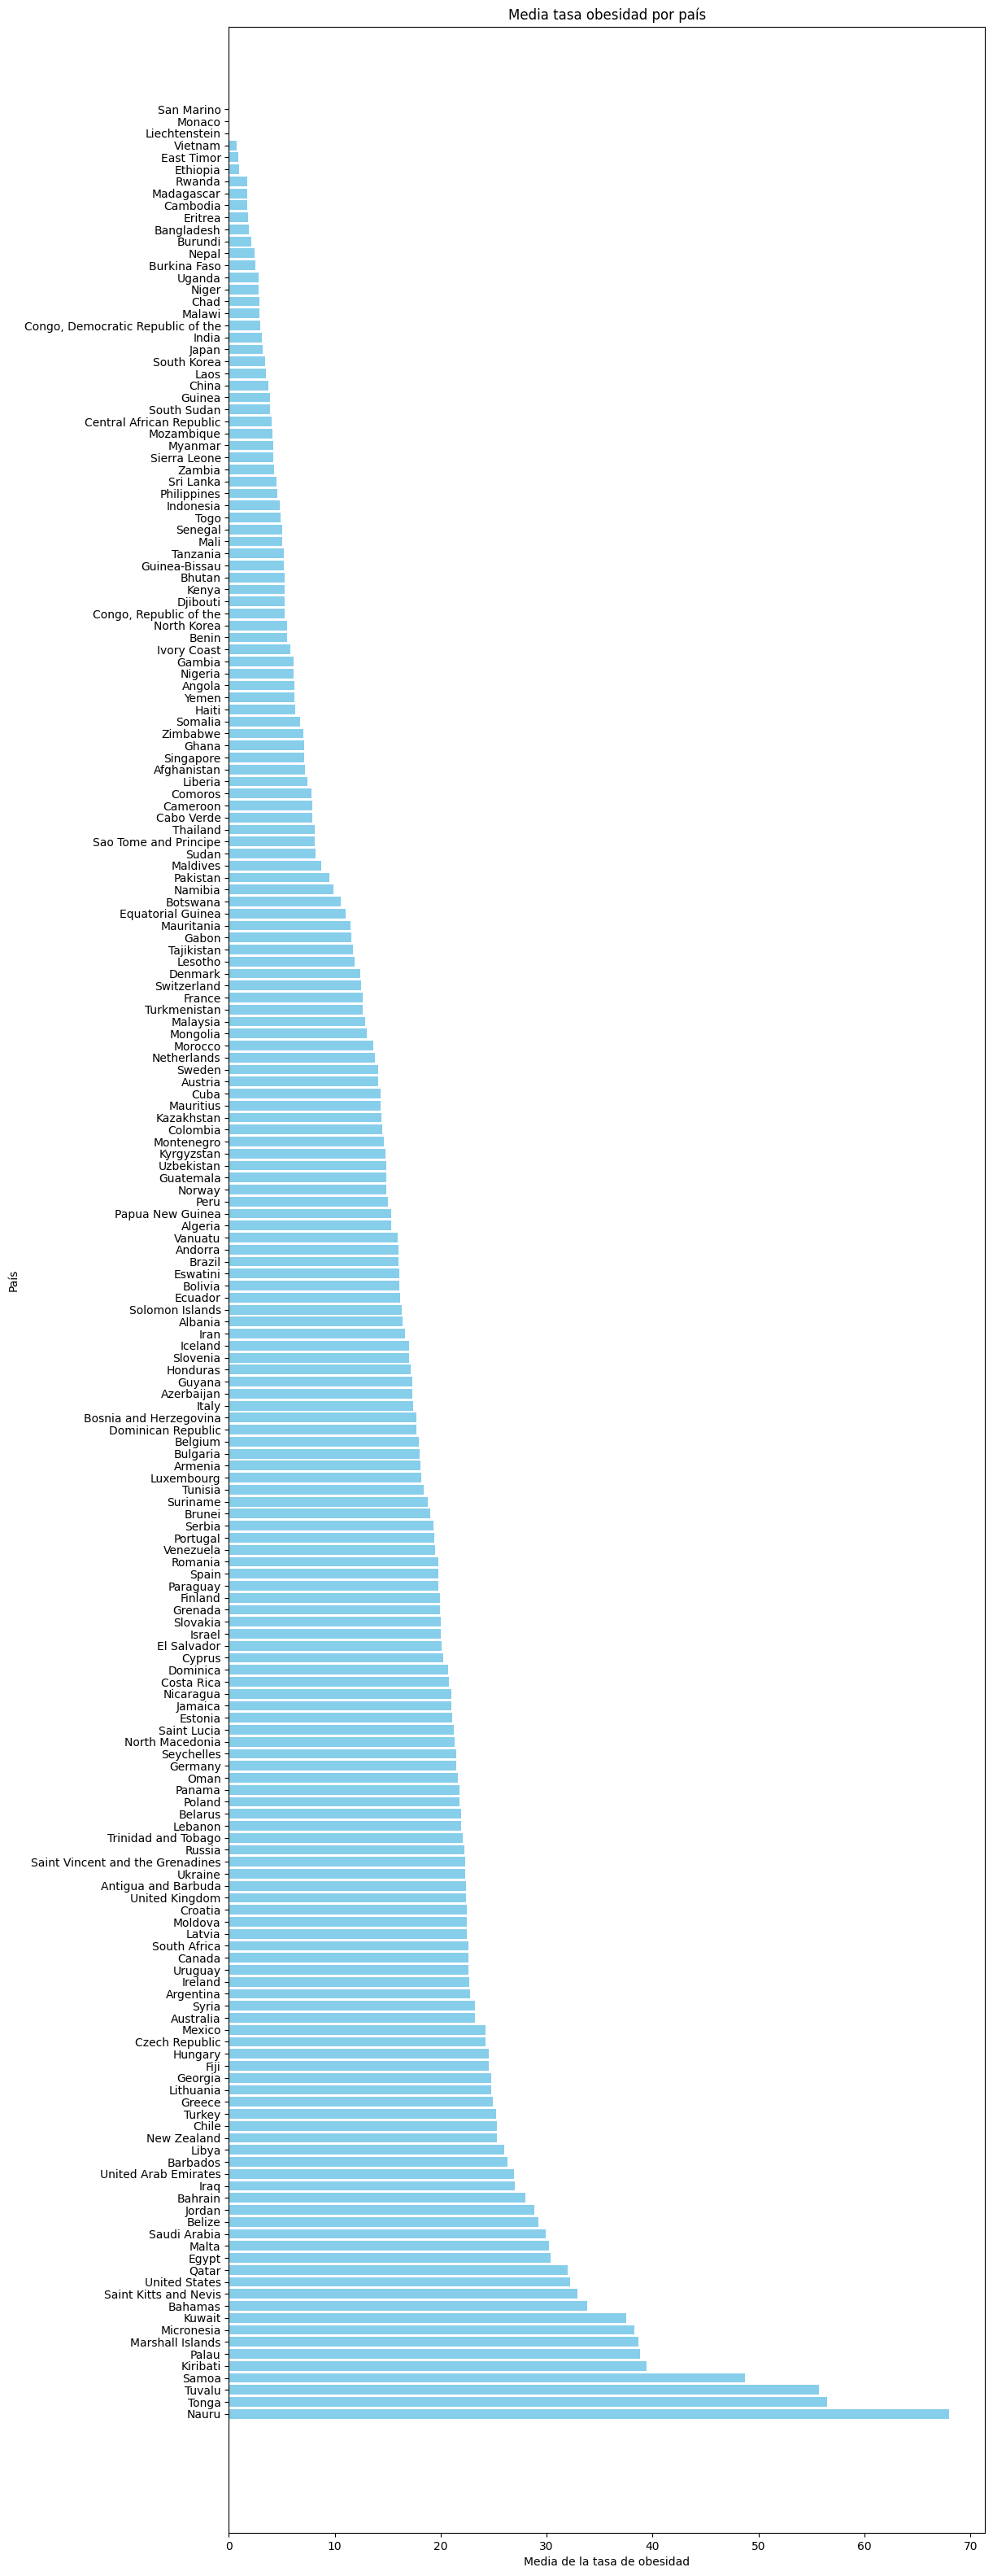

In [9]:
df_media_obesity_sorted = df_media_obesity.sort_values(by="Media_obesity", ascending=False)

plt.figure(figsize=(12, 40))
plt.barh(df_media_obesity_sorted['Country'], df_media_obesity_sorted['Media_obesity'], color='skyblue')
plt.title('Media tasa obesidad por país')
plt.xlabel('Media de la tasa de obesidad')
plt.ylabel('País')
plt.show()


##### Esperanza de vida

In [ ]:
df_main.columns

Index(['Unnamed: 0', 'Country', 'Continent', 'Year', 'Population', 'Gender',
       'Obesity_rate', 'Freq_obesity_low', 'Freq_obesity_high', 'Freq_obesity',
       'Life_expt', 'Population_km2', 'Density'],
      dtype='object')

In [23]:
country_search = df_main['Country'].unique()
Esp_vida_paises = []

for country in country_search:
    pais = df_main.loc[(df_main['Country']== country)]
    media_esp_vida = int(pais['Life_expt'].mean())
    
    Esp_vida_paises.append({
        "Country": country,
        "Media_Esp_vida": media_esp_vida
    })

df_media_esp_vida = pd.DataFrame(Esp_vida_paises)

In [24]:
df_media_esp_vida.to_csv("df_media_esp_vida.csv")

In [25]:
fig = px.choropleth(df_media_esp_vida,
                    locations="Country",
                    locationmode='country names',
                    color="Media_Esp_vida",
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    title="Mapa de la media Esperanza de Vida por país")
fig.show()


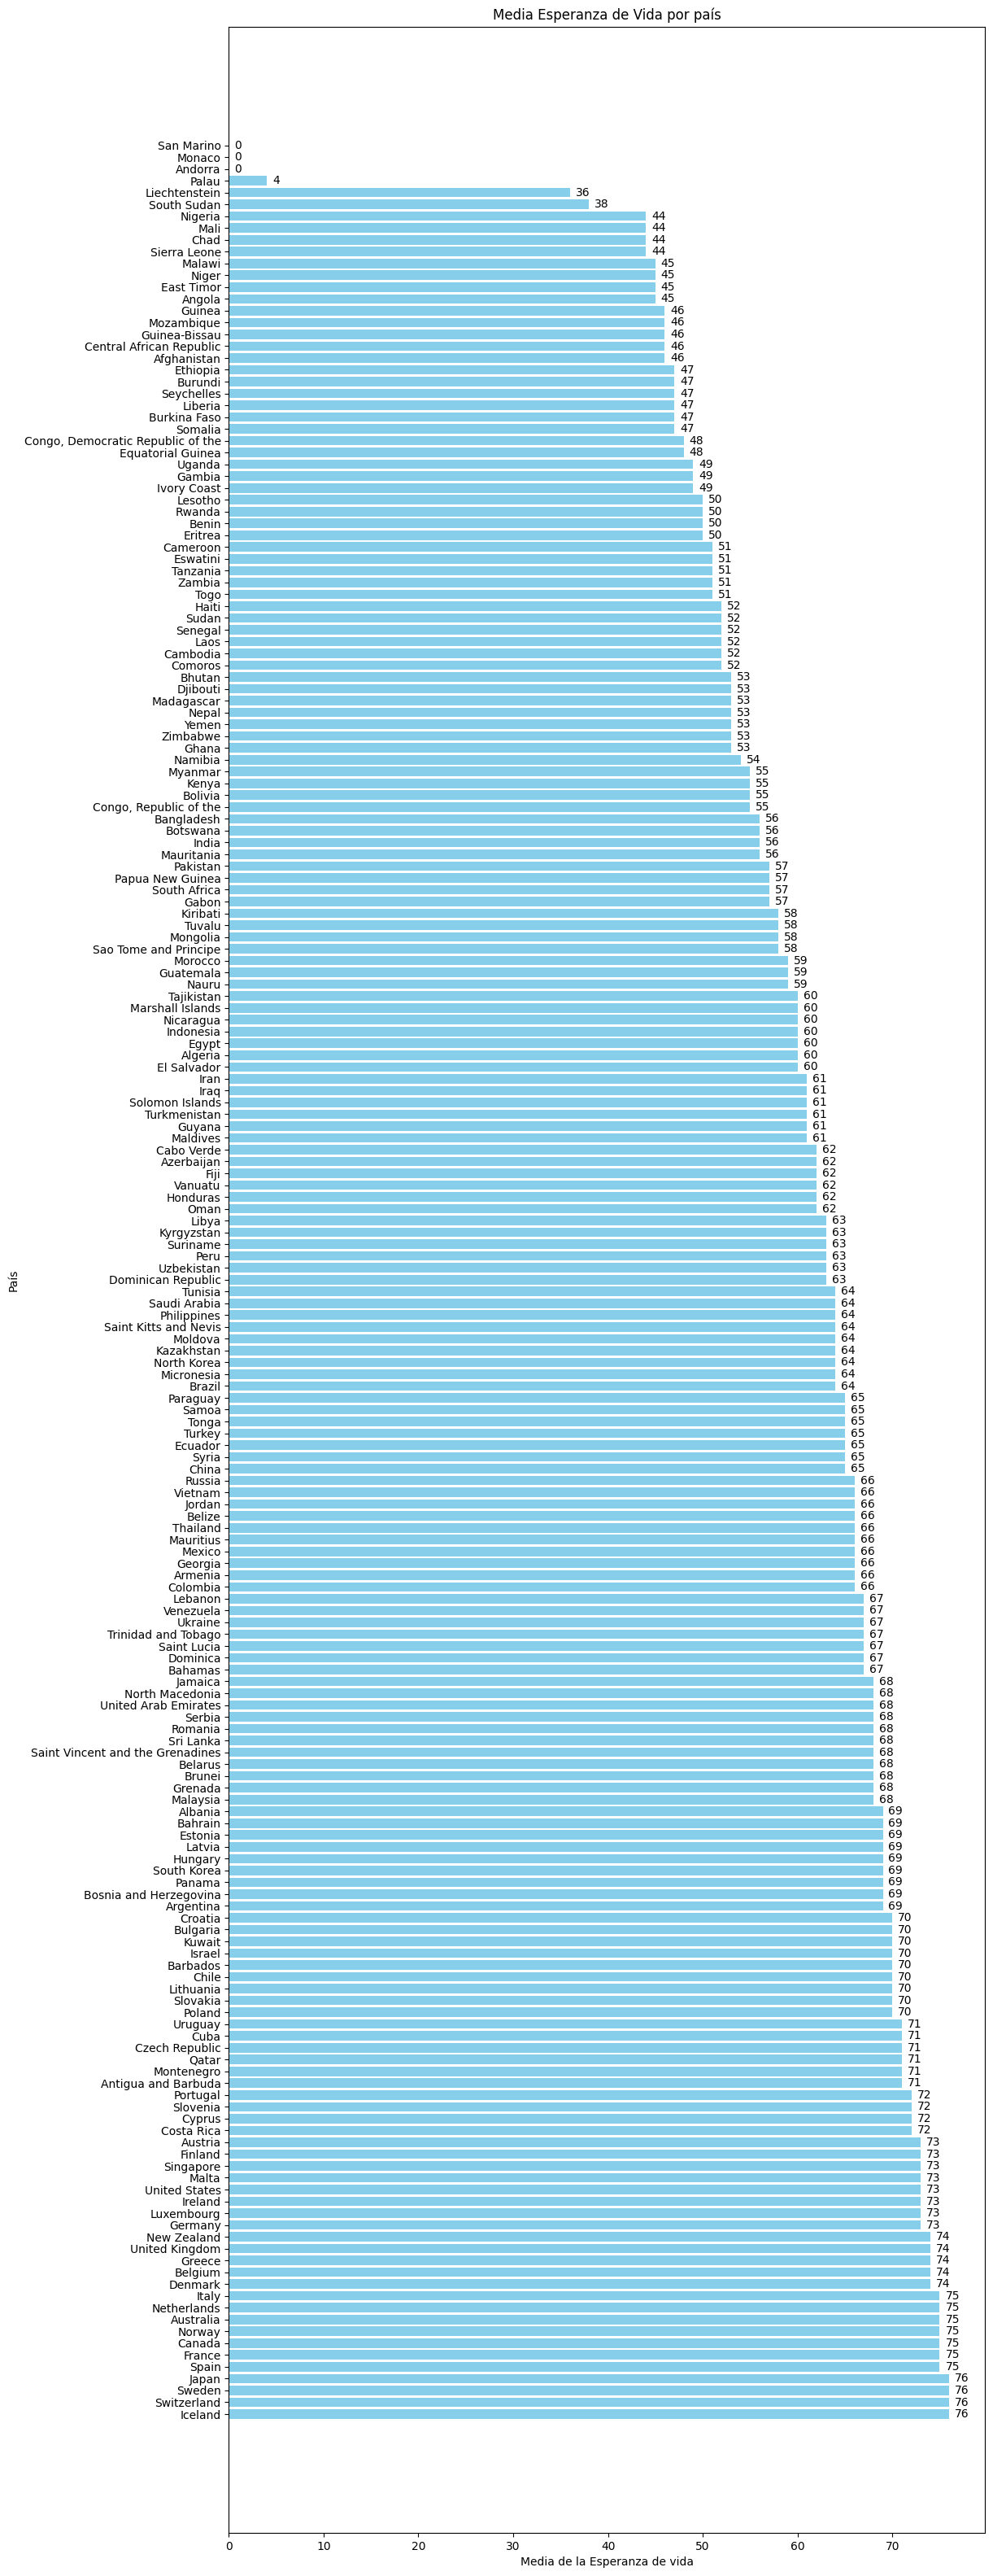

In [30]:
# Crear el gráfico de barras
df_media_Esp_vida_sorted = df_media_esp_vida.sort_values(by="Media_Esp_vida", ascending=False)

plt.figure(figsize=(12, 40))
bars = plt.barh(df_media_Esp_vida_sorted['Country'], df_media_Esp_vida_sorted['Media_Esp_vida'], color='skyblue')
plt.title('Media Esperanza de Vida por país')
plt.xlabel('Media de la Esperanza de vida')
plt.ylabel('País')

# Añadir anotaciones con la función annotate()
for i, bar in enumerate(bars):
    # Obtener el ancho de la barra (que es el valor de Media_Esp_vida)
    width = bar.get_width()
    
    # Usar annotate para colocar el texto al final de cada barra
    plt.annotate(f'{width:d}',  # Mostrar el valor como entero 
                 xy=(width, bar.get_y() + bar.get_height() / 2),  # Coordenadas de la barra
                 xytext=(5, 0),  # Desplazamiento del texto con respecto a las coordenadas
                 textcoords="offset points",  # Mover el texto 5 puntos a la derecha
                 va='center')  # Alinear verticalmente al centro de la barra

plt.show()

Correlación por País:

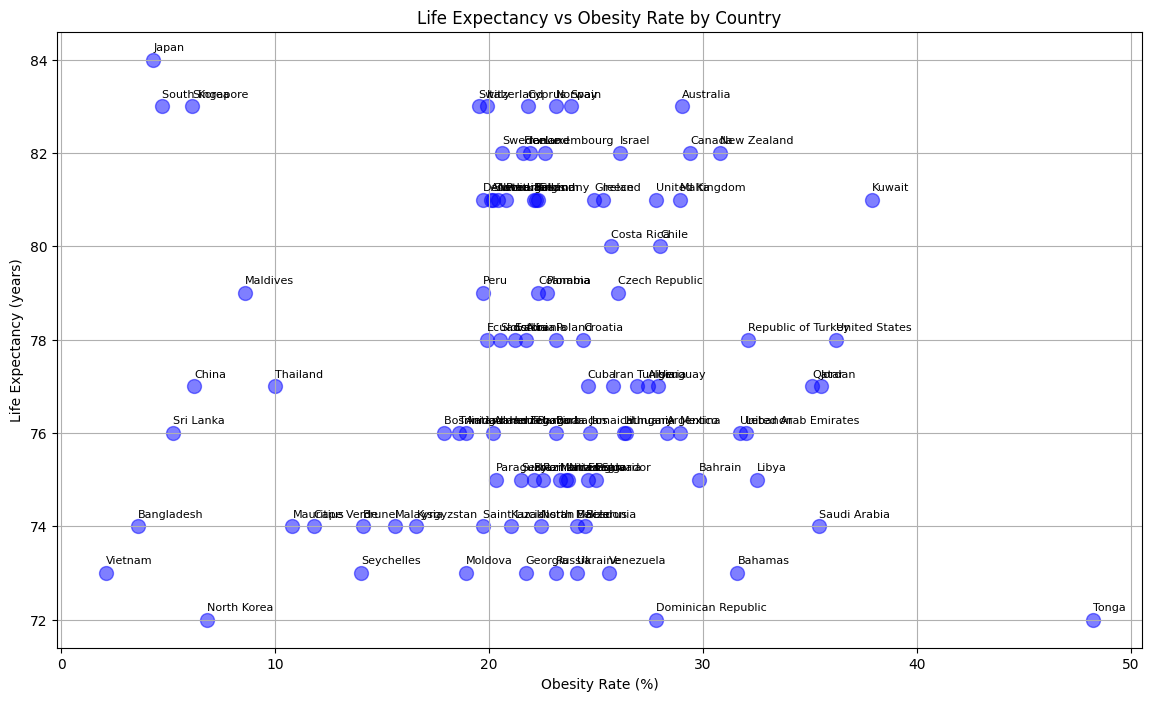

In [4]:
# Crear el gráfico de burbujas
plt.figure(figsize=(14, 8))

plt.scatter(df['Obesity rate %'], df['Life Expectancy'], s=100, alpha=0.5, c='blue')

# Añadir etiquetas a cada burbuja con desplazamiento
for i in range(df.shape[0]):
    plt.text(df['Obesity rate %'][i] + 0.001, df['Life Expectancy'][i] + 0.2, df['Country'][i], fontsize=8)

plt.title('Life Expectancy vs Obesity Rate by Country')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()



Calcular correlación por País

In [5]:
#calcular el coeficiente de correlación de Pearson
correlation = df['Life Expectancy'].corr(df['Obesity rate %'])
print(f'Correlation between Life Expectancy and Obesity Rate: {correlation:.2f}')


Correlation between Life Expectancy and Obesity Rate: -0.02


El valor del coeficiente de correlación estará entre -1 y 1:

* Un valor cercano a 1 indica una fuerte relación positiva.
* Un valor cercano a -1 indica una fuerte relación negativa.
* Un valor cercano a 0 indica poca o ninguna relación lineal.

Con este análisis y el gráfico, puedemos visualizar y cuantificar la relación entre la expectativa de vida y la tasa de obesidad. Si el coeficiente de correlación es cercano a 0, como parece ser el caso al observar los datos dispersos en el gráfico, entonces no hay una fuerte relación lineal entre estas dos variables.

Una correlación de -0.02 indica una relación muy débil y negativa entre la expectativa de vida y la tasa de obesidad en los países de tu conjunto de datos. Esto significa que, según estos datos, no hay una relación significativa entre la obesidad y la expectativa de vida: a medida que la tasa de obesidad cambia, la expectativa de vida no parece cambiar de manera predecible.

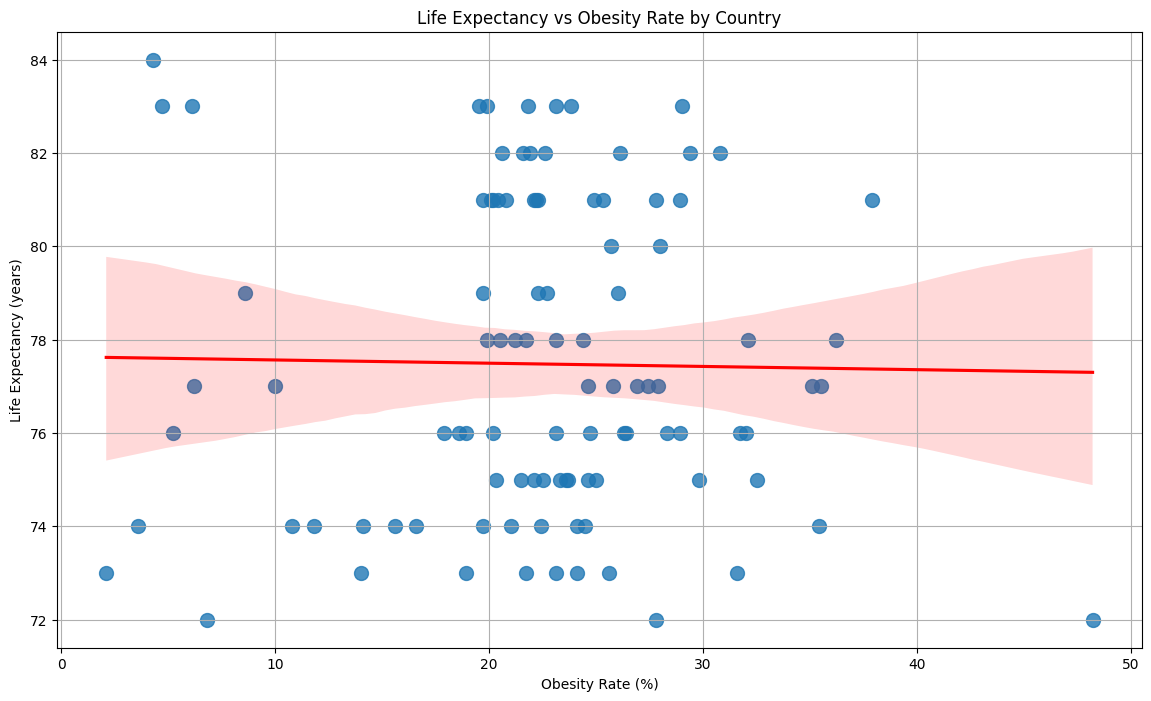

In [6]:
# Crear el gráfico de dispersión con Seaborn para incluir una línea de regresión
plt.figure(figsize=(14, 8))
sns.regplot(x='Obesity rate %', y='Life Expectancy', data=df, scatter_kws={'s':100}, line_kws={"color":"red"})
plt.title('Life Expectancy vs Obesity Rate by Country')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

Correlación por Continente:

In [7]:
# Calcular la correlación por continente
continent_correlation = df.groupby('Continent').apply(lambda x: x['Life Expectancy'].corr(x['Obesity rate %']))
print(continent_correlation)


Continent
Africa      0.735178
Americas    0.065612
Asia       -0.036194
Europe     -0.115744
Oceania    -0.999996
dtype: float64


C:\Users\alex_\AppData\Local\Temp\ipykernel_17248\2941624580.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  continent_correlation = df.groupby('Continent').apply(lambda x: x['Life Expectancy'].corr(x['Obesity rate %']))


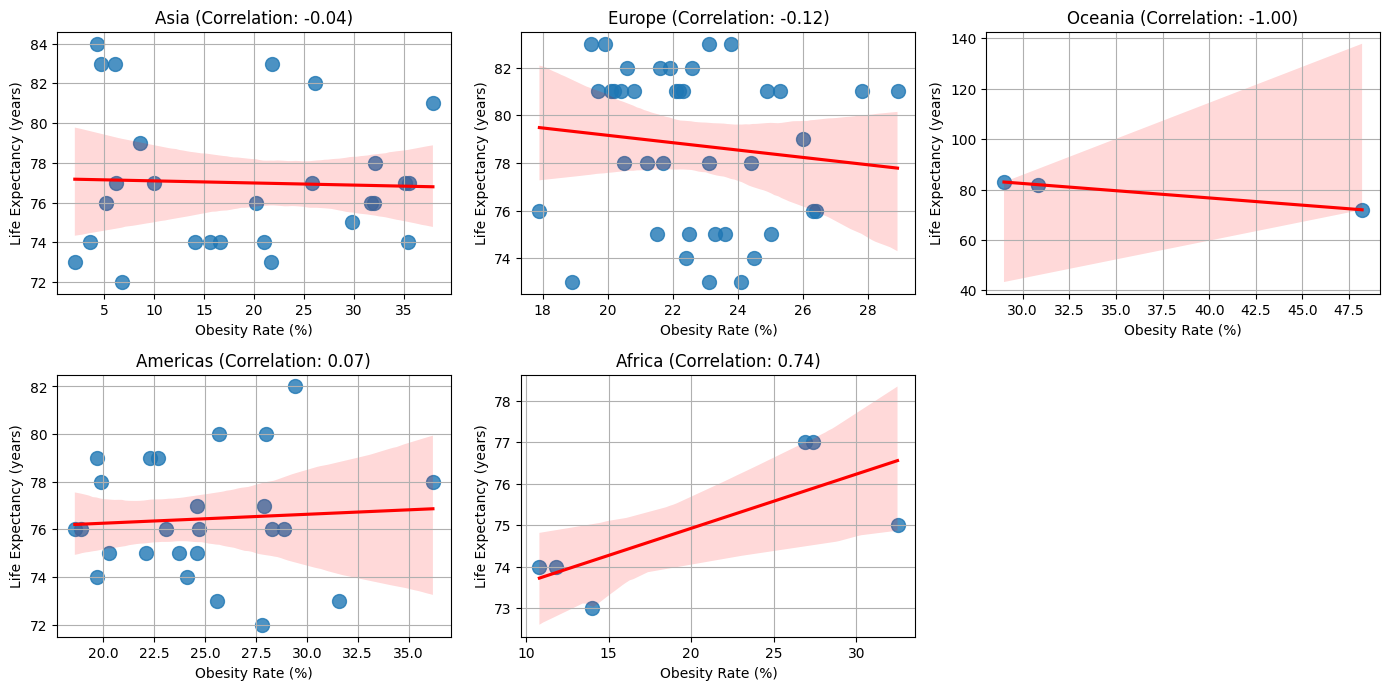

In [8]:
# Crear gráficos de dispersión por continente con líneas de regresión
plt.figure(figsize=(14, 10))

for i, continent in enumerate(df['Continent'].unique()):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x='Obesity rate %', y='Life Expectancy', data=df[df['Continent'] == continent], scatter_kws={'s': 100}, line_kws={"color": "red"})
    plt.title(f'{continent} (Correlation: {continent_correlation[continent]:.2f})')
    plt.xlabel('Obesity Rate (%)')
    plt.ylabel('Life Expectancy (years)')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
# Calcular la correlación para cada continente
correlation_by_continent = df.groupby('Continent').apply(lambda x: x['Life Expectancy'].corr(x['Obesity rate %'])).reset_index()
correlation_by_continent.columns = ['Continent', 'Correlation']

# Unir la correlación de cada continente al DataFrame original
df = df.merge(correlation_by_continent, on='Continent', how='left')

# Exportar a un archivo CSV
df.to_csv('life_expectancy_obesity_continent_correlation.csv', index=False)

df


C:\Users\alex_\AppData\Local\Temp\ipykernel_17248\3044432308.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_continent = df.groupby('Continent').apply(lambda x: x['Life Expectancy'].corr(x['Obesity rate %'])).reset_index()


,Country,Life Expectancy,Obesity rate %,Continent,Correlation
0,Japan,84,4.3,Asia,-0.036194
1,South Korea,83,4.7,Asia,-0.036194
2,Spain,83,23.8,Europe,-0.115744
3,Singapore,83,6.1,Asia,-0.036194
4,Cyprus,83,21.8,Asia,-0.036194
...,...,...,...,...,...
95,Saudi Arabia,74,35.4,Asia,-0.036194
96,North Korea,72,6.8,Asia,-0.036194
97,Bangladesh,74,3.6,Asia,-0.036194
98,Tonga,72,48.2,Oceania,-0.999996


### Interpretación de las correlaciones

1. Africa: 0.735178

* Correlación positiva fuerte: En África, parece que existe una relación positiva relativamente fuerte entre la expectativa de vida y la tasa de obesidad. Esto sugiere que en países africanos, a medida que aumenta la tasa de obesidad, también tiende a aumentar la expectativa de vida.

2. Americas: 0.065612

* Correlación positiva débil: En las Américas, la correlación es positiva pero muy débil. Esto indica que no hay una relación clara entre la expectativa de vida y la tasa de obesidad en este continente.

3. Asia: -0.036194

* Correlación negativa muy débil: En Asia, la correlación es negativa pero casi nula. Esto sugiere que no hay una relación significativa entre la expectativa de vida y la tasa de obesidad.

4. Europe: -0.115744

* Correlación negativa débil: En Europa, hay una correlación negativa débil. Esto indica que en Europa, a medida que aumenta la tasa de obesidad, la expectativa de vida tiende a disminuir ligeramente.

5. Oceania: -0.999996

* Correlación negativa casi perfecta: En Oceanía, la correlación es extremadamente fuerte y negativa. Esto significa que en los países de Oceanía, hay una fuerte relación inversa entre la tasa de obesidad y la expectativa de vida: a medida que la tasa de obesidad aumenta, la expectativa de vida disminuye de manera drástica. Esta relación puede estar influenciada por un número pequeño de países en el conjunto de datos.

#### Conclusiones

1. Africa: La fuerte correlación positiva puede ser contraria a lo esperado, pero puede reflejar ciertas características específicas de los países africanos que tienen mejores expectativas de vida y tasas de obesidad más altas, posiblemente debido a factores económicos o de desarrollo.

2. Americas y Asia: La falta de una correlación significativa sugiere que otros factores pueden estar influyendo más en la expectativa de vida en estos continentes.

3. Europe: La ligera correlación negativa indica que hay una tendencia a que la obesidad afecte la expectativa de vida, aunque no de manera muy fuerte.

4. Oceania: La correlación extremadamente alta y negativa puede ser indicativa de un patrón fuerte en los países de este continente, pero también puede estar influenciada por un número pequeño de países o valores atípicos.

Prueba